# Face Verification with the VGGFace2 model.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.spatial.distance import cosine
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
PATH_TO_IMGS = "./LabeledFacesInTheWild/"

In [4]:
def get_face(filename, required_size=(224, 224)):
    """
    Extracts face from the image.
    """
    
    pixels = plt.imread(filename)  # Getting array represantation of the image.
    detector = MTCNN()  # Using convnet for finding faces on the image.
    
    results = detector.detect_faces(pixels)
    x1, y1, width, height = results[0]['box']  # Getting coordinates of the first appeared face.
    face = pixels[y1 : y1 + height, x1 : x1 + width]  # Extracting face-array from original image.
    
    image = Image.fromarray(face)
    image = image.resize(required_size)
    
    return np.asarray(image)
 

def get_embeddings(filenames, path_to_dir='./images/'):
    """
    Get embeddings of the faces.
    """
    
    mod_filenames = [path_to_dir + fn for fn in filenames]
    
    faces = [get_face(fn) for fn in mod_filenames]  # Extracting face-arrays from images.
    samples = np.asarray(faces, 'float32')
    
    samples = preprocess_input(samples, version=2)
    
    # include_top = False  -->  model without classifier.
    # pooling = 'avg'  -->  h x w x d layer into 1 x 1 x d
    model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')
    
    yhat = model.predict(samples)  # Getting vector-embedding of the face.
    return yhat
 

def matches(embedding1, embedding2, threshold=0.6):
    """
    Finds out, if the embedding corresponds to the same person.
    """
    
    # Calculates cosine distance between vectors.
    score = cosine(embedding1, embedding2)

    return (score <= threshold), score


def verification(fname1, fname2, threshold=0.6, path_to_dir='./images/', show_images=True):
    """
    Shows if given two images represent same person.
    """
    
    embed1, embed2 = get_embeddings((fname1, fname2), path_to_dir=path_to_dir)
    
    match, score = matches(embed1, embed2, threshold=threshold)
    
    if show_images:
        mod_fname1, mod_fname2 = path_to_dir + fname1, path_to_dir + fname2
        faces = np.concatenate((get_face(mod_fname1), get_face(mod_fname2)), axis=1)
        
        plt.figure()
        plt.imshow(faces)
        plt.show()
    
    if match:
        print("These pictures represent the same person. Cosine distance is {:.3f} (<{:.3f})".format(score, threshold))
    else:
        print("These pictures depict different people. Cosine distance is {:.3f} (>{:.3f})".format(score, threshold))


In [5]:
filenames = ["Johnny_Depp/Johnny_Depp_0001.jpg", 
             "Johnny_Depp/Johnny_Depp_0002.jpg",
             "Johnny_Depp/Johnny_Depp_0003.jpg", 
             "George_W_Bush/George_W_Bush_0001.jpg", 
             "Zico/Zico_0001.jpg"]

In [6]:
#print('Positive Tests')
#verification(filenames[0], filenames[1], path_to_dir=PATH_TO_IMGS)
#verification(filenames[0], filenames[2], path_to_dir=PATH_TO_IMGS)
#print()
#print('Negative Tests')
#verification(filenames[0], filenames[3], path_to_dir=PATH_TO_IMGS)
#verification(filenames[0], filenames[4], path_to_dir=PATH_TO_IMGS)

W0728 09:35:45.192861 140579830359872 deprecation_wrapper.py:119] From /home/dmkirichen/anaconda3/lib/python3.7/site-packages/mtcnn/mtcnn.py:187: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0728 09:35:45.311305 140579830359872 deprecation_wrapper.py:119] From /home/dmkirichen/anaconda3/lib/python3.7/site-packages/mtcnn/mtcnn.py:193: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0728 09:35:45.686309 140579830359872 deprecation_wrapper.py:119] From /home/dmkirichen/anaconda3/lib/python3.7/site-packages/mtcnn/network.py:43: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0728 09:35:45.687565 140579830359872 deprecation_wrapper.py:119] From /home/dmkirichen/anaconda3/lib/python3.7/site-packages/mtcnn/layer_factory.py:88: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0728 09:35:45.718746 140579830359872 deprecation_wrapper.py:119] From

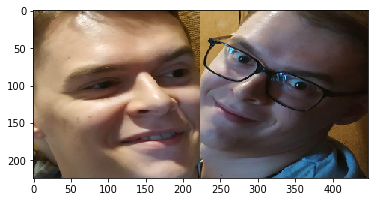

These pictures represent the same person. Cosine distance is 0.412 (<0.600)


In [7]:
fnames = ["Omelchenko_Dmytro_0001.jpg", "Omelchenko_Dmytro_0002.jpg"]
verification(fnames[0], fnames[1])